In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier

In [2]:
df = pd.read_csv("patents_cleaned.csv")
df = df.drop(columns=["Unnamed: 0"])
df = df[df['patent_kind'] != 'E1']
df.head()

,patent_number,patent_title,patent_kind,patent_type,patent_year,patent_date,patent_abstract,patent_firstnamed_assignee_city,patent_firstnamed_assignee_country,patent_firstnamed_assignee_id,...,patent_firstnamed_inventor_state,patent_num_cited_by_us_patents,patent_num_combined_citations,patent_num_foreign_citations,patent_num_us_application_citations,patent_num_us_patent_citations,patent_num_claims,detail_desc_length,patent_processing_time,patent_average_processing_time
0,10001775,Machine learning systems and techniques to opt...,B2,utility,2018,2018-06-19,"A system, an apparatus or a process may be con...",Foster City,US,4d3af6fb-e1fe-46c9-a659-1f35f0605bfe,...,CA,0,128,8,102,18,21,149708.0,538,871.0
1,10004112,Machine learning apparatus and coil electric h...,B2,utility,2018,2018-06-19,A machine learning apparatus includes a state ...,Yamanashi,JP,7dcb8d36-d147-4198-8843-8346ac374d1d,...,Foreigner,1,15,10,2,3,6,30232.0,628,867.0
2,10013404,Targeted story summarization using natural lan...,B2,utility,2018,2018-07-03,A computer system may receive a textual work. ...,Armonk,US,131272b5-c296-4ef9-b2ae-2e34e9055490,...,MN,2,30,0,18,12,19,62615.0,943,1034.0
3,10015181,Using natural language processing for detectio...,B2,utility,2018,2018-07-03,"Detection of unintended application behaviors,...",Armonk,US,131272b5-c296-4ef9-b2ae-2e34e9055490,...,NY,0,10,0,7,3,14,20517.0,775,988.0
4,10019491,Machine learning of response selection to stru...,B1,utility,2018,2018-07-10,A machine learning of response selection to st...,Austin,US,572b5f95-960b-4fcf-86e2-580c0541439e,...,TX,6,4,0,2,2,30,33379.0,145,894.0


In [3]:
numeric_data = df.select_dtypes(include=['int64', 'float64']).copy()
X = numeric_data.drop(columns=["patent_year"])
y = df['patent_kind']

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=95, stratify=y_encoded)

In [4]:
rf_model = RandomForestClassifier(random_state=42, class_weight='balanced')
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)
rf_cm = confusion_matrix(y_test, y_pred_rf)
rf_acc = accuracy_score(y_test, y_pred_rf)

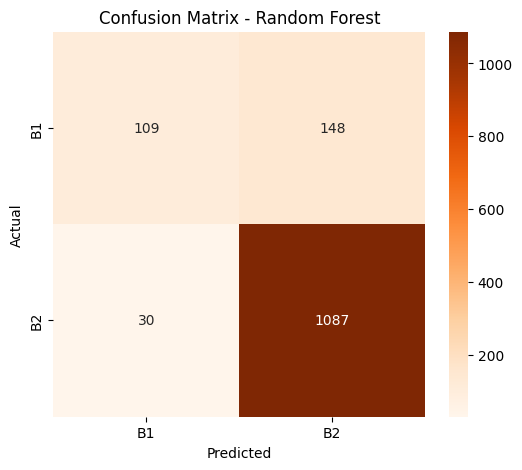

0.8704512372634643

In [12]:
plt.figure(figsize=(6, 5))
sns.heatmap(rf_cm, annot=True, fmt='d', cmap="Oranges", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title(f"Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

rf_acc
